In [8]:
#Import Necessary Packages

import numpy as np  
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import os
from PIL import Image
from skimage.transform import resize
import pickle

In [2]:
#import the dataset of moons400.csv
read = 'C:/Users/Admin/Downloads/Assignment 1 Required Materials (1)/moons400.csv'
df = pd.read_csv(read ,  Header = 0)
df

,X0,X1,Class
0,2.071069,0.411529,1
1,-0.335398,1.032266,0
2,1.256631,-0.363937,1
3,1.269361,-0.379086,1
4,-0.839940,0.203669,0
...,...,...,...
395,0.130891,0.022948,1
396,0.279114,0.862536,0
397,1.966930,0.433234,1
398,0.308508,-0.155109,1


In [3]:
df.describe()

,X0,X1,Class
count,400.000000,400.000000,400.000000
mean,0.496913,0.260841,0.500000
std,0.870526,0.504415,0.500626
min,-1.219403,-0.797520,0.000000
25%,-0.050724,-0.152967,0.000000
50%,0.505190,0.285722,0.500000
75%,1.080733,0.704522,1.000000
max,2.178136,1.474150,1.000000


In [4]:
trainingEg = pd.DataFrame(df[1:250])
# Extract labels
y = trainingEg['Class']
# Separate dataframe containing features
trainingSet=pd.DataFrame()
trainingSet['X1'] = trainingEg['X0']
trainingSet['X2'] = trainingEg['X1']
# trainingSet['X3'] = trainingEg['X2']
#trainingSet

In [5]:
#learning rate
alpha = 0.01 

In [6]:
df.describe()

,X0,X1,Class
count,400.000000,400.000000,400.000000
mean,0.496913,0.260841,0.500000
std,0.870526,0.504415,0.500626
min,-1.219403,-0.797520,0.000000
25%,-0.050724,-0.152967,0.000000
50%,0.505190,0.285722,0.500000
75%,1.080733,0.704522,1.000000
max,2.178136,1.474150,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X0      400 non-null    float64
 1   X1      400 non-null    float64
 2   Class   400 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 9.5 KB


In [8]:
# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

In [9]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 400
len(X[0]): 2
len(X[:,0]): 400
X: nsamples = 400 , nattribs = 2
len(y) 400
np.shape(y): (400,)
np.shape(yt): (400, 1)
y transpose: nsamples = 400 , nattribs = 1


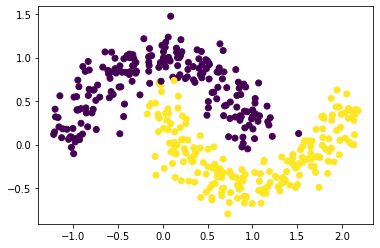

In [10]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

Text(0, 0.5, 'X1')

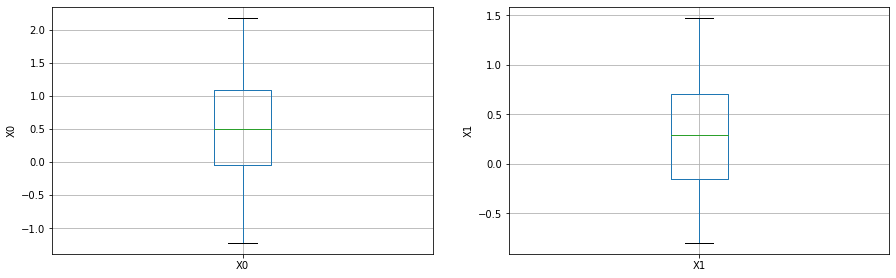

In [11]:
# model = neuralNet_model(2,3,1)

# model
# draw boxplots to visualize outliers


plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='X0')
fig.set_title('')
fig.set_ylabel('X0')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='X1')
fig.set_title('')
fig.set_ylabel('X1')



In [12]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [13]:
class logisticRegression:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))


In [14]:
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)*200
  return accuracy

# print(accuracy)

In [15]:
regressor = logisticRegression()
regressor.fit(X_train,y_train)

In [16]:
predict = regressor.predict(X_test)

print("Accuracy of LogisticRegression: ",accuracy(y_test, predict))

Accuracy of LogisticRegression:  92.5


In [17]:
# Read Input data from csv file
def make_moons(file_name):
    # Import dataset using pandas
    df = pd.read_csv(file_name)

    # The y values are those labelled 'Class': extract their values
    y = df['Class'].values

    # The x values are all other columns
    del df['Class']   # drop the 'Class' column from the dataframe
    X = df.values     # convert the remaining columns to a numpy array
    return X, y

In [18]:
# Read the Blobs dataset
X, y = make_moons("C:/Users/Admin/Downloads/Assignment 1 Required Materials (1)/moons400.csv")

In [19]:
# plt.scatter(X[:, 0], X[:, 1], s=10, c=y)

In [20]:
X -= X.min()
X /= X.max()
X.min(), X.max()

(0.0, 1.0)

In [21]:
np.unique(y)

array([0, 1], dtype=int64)

In [22]:
X.shape, y.shape

((400, 2), (400,))

In [23]:
X = X.T

y = y.reshape(1, -1)

In [24]:
X.shape, y.shape

((2, 400), (1, 400))

In [25]:
import math

def sigmoid(x):
    return 1 / (1 + math.e ** -x)

In [26]:
# Construct a Shallow Neural Network with a single hidden layer.
class ShallowNN:
    
    # Initialize the learning rate alpha, the number of iterations, and the threshold with this function
    def __init__(self, alpha = 0.01, iterations = 1000, threshold = 1e-6): 
        self.alpha = alpha
        self.iterations = iterations
        self.threshold = threshold
    
    # Set the starting weights and bias to a set of valid values
    def Initialise_nn(self, features_x, hidden_nodes):
        W1 = np.random.normal(0, 0.01, size = (features_x, hidden_nodes))# Initialize the random values to the weights for nodes of an hidden layer
        # Initialize bias = 0 for nodes is an hidden layer
        b1 = np.zeros((hidden_nodes, 1))
        # Initialize the random values to the weights for the node in output layer
        W2 = np.random.normal(0, 0.01, size = (1, hidden_nodes))
        # Initialize bias = 0 for the node is an output layer
        b2 = 0
        return W1, b1, W2, b2

    # Activation function to find sigmoid values of input
    def Sigmoid(self, z): 
        z = np.array(z,dtype=float)
        self.err_status = np.geterr()
        np.seterr(over = 'ignore')
        return 1 / (1 + np.exp(-z))


In [27]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 10  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 10000

losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 500 == 0:
        print(f"Epoch of NN {epoch} is {epoch_loss:.3f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Epoch of NN 0 is 0.23750
Epoch of NN 500 is 0.04288
Epoch of NN 1000 is 0.04280
Epoch of NN 1500 is 0.04276
Epoch of NN 2000 is 0.04276
Epoch of NN 2500 is 0.04278
Epoch of NN 3000 is 0.04287
Epoch of NN 3500 is 0.04251
Epoch of NN 4000 is 0.03266
Epoch of NN 4500 is 0.02521
Epoch of NN 5000 is 0.03072
Epoch of NN 5500 is 0.01795
Epoch of NN 6000 is 0.03383
Epoch of NN 6500 is 0.01456
Epoch of NN 7000 is 0.02225
Epoch of NN 7500 is 0.01293
Epoch of NN 8000 is 0.01245
Epoch of NN 8500 is 0.01215
Epoch of NN 9000 is 0.01222
Epoch of NN 9500 is 0.01129


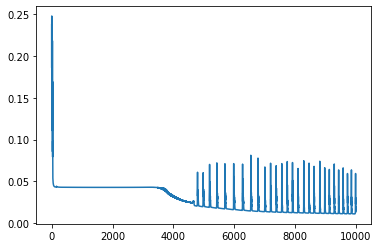

In [28]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs+1 ), np.array(losses))

In [29]:
# final output from the model
output[:, :5]

array([[9.80996863e-01, 5.24579156e-10, 9.99105455e-01, 9.99165729e-01,
        1.18963106e-05]])

In [30]:
y[:,1:6]

array([[0, 1, 1, 0, 1]], dtype=int64)

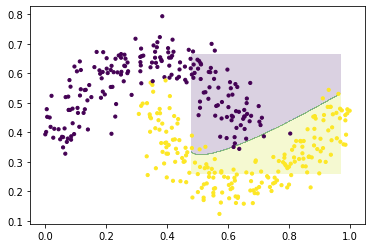

In [31]:
# Define region of interest by data limits
steps = 500
x_span = np.linspace(X[ :,0].min(), X[ :,0].max(), steps)
y_span = np.linspace(X[:,1].min(), X[:,1].max(), steps)
xx, yy = np.meshgrid(x_span, y_span)

# forward pass for region of interest
hiddenLayer_linearTransform = np.dot(
    weights_input_hidden.T, np.c_[xx.ravel(), yy.ravel()].T
)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output_span = sigmoid(outputLayer_linearTransform)

# Make predictions across region of interest
labels = (output_span > 0.5).astype(int)

# Plot decision boundary in region of interest
z = labels.reshape(xx.shape)
fig, plt = plt.subplots()
plt.contourf(xx, yy, z, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = (output > 0.5).astype(int)

# create scatter plot
plt.scatter(X[0, :], X[1, :], s=10, c=y.squeeze())

In [32]:
data = 'C:/Users/Admin/Downloads/Assignment 1 Required Materials (1)/blobs250.csv'
df = pd.read_csv(data ,  header = 0)
df

,X0,X1,X2,Class
0,0.961400,5.677191,11.407020,0
1,2.372228,5.335292,9.460564,0
2,2.022249,7.501127,9.072816,0
3,4.464773,7.819388,9.183951,0
4,1.191087,5.880269,10.119531,0
...,...,...,...,...
245,0.380539,6.062599,8.584218,0
246,2.929468,-8.016101,2.612362,1
247,2.758227,-8.496349,2.857833,1
248,2.236813,5.510850,10.399619,0


In [33]:
# The y values are those labelled 'Class': extract their values
y = df['Class'].values

# The x values are all other columns
del df['Class']   # drop the 'Class' column from the dataframe
X = df.values     # convert the remaining columns to a numpy array

In [34]:
# Some examples of working with the data, to look at rows/columns
print ("len(X):", len(X))            # outer array: one per sample
print ("len(X[0]):", len(X[0]))      # each inner array is the attributes of one sample
print ("len(X[:,0]):", len(X[:,0]))  # select column 0 from array

# np.shape returns all dimensions of the array
(nsamples, nattribs) = np.shape(X)
print ("X: nsamples =", nsamples, ", nattribs =", nattribs)

# Now example the y vector (1D array)
print ("len(y)", len(y))
print ("np.shape(y):", np.shape(y))

# You can transpose the y data using 'reshape'
yt = np.reshape(y, (len(y),1))  
print ("np.shape(yt):", np.shape(yt))
(nsamples, nattribs) = np.shape(yt)
print ("y transpose: nsamples =", nsamples, ", nattribs =", nattribs)

len(X): 250
len(X[0]): 3
len(X[:,0]): 250
X: nsamples = 250 , nattribs = 3
len(y) 250
np.shape(y): (250,)
np.shape(yt): (250, 1)
y transpose: nsamples = 250 , nattribs = 1


In [35]:
# plot X[0] vs X[1] and colour points according to the class, y
plt.scatter(X[:,0], X[:,1], c=y)  

In [36]:
class logisticRegression:

  def __init__(self,lr=0.001,n_iters=1000):
    self.lr = lr
    self.n_iters = n_iters
    self.weights = None
    self.bias = None

  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0
  def fit(self,X,y):
    #init parameters
    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)
    self.bias = 0

    #gradient descent
    for _ in range(self.n_iters):
      linear_model = np.dot(X,self.weights) + self.bias
      y_predicted = self._sigmoid(linear_model)

  def predict(self,X):
    linear_model = np.dot(X,self.weights) + self.bias
    y_predicted = self._sigmoid(linear_model)
    y_predicted_cls = [1 if i>0.5 else 0 for i in y_predicted]
    return y_predicted_cls
  def _sigmoid(self,x):
    return(1/(1+np.exp(-x)))


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [38]:
X_test.shape

(50, 3)

In [39]:
def accuracy(y_true,y_pred):
  accuracy = np.sum(y_true == y_pred)/len(y_true)*200
  return accuracy

In [40]:
regressor = logisticRegression()
regressor.fit(X_train,y_train)

In [41]:
predictions = regressor.predict(X_test)

print("Accuracy of LogisticRegression: ",accuracy(y_test, predictions))

Accuracy of LogisticRegression:  88.0


In [86]:
# Read Input data from csv file
def make_blobs(file_name):
    # Import dataset using pandas
    df = pd.read_csv(file_name)

    # The y values are those labelled 'Class': extract their values
    y = df['Class'].values

    # The x values are all other columns
    del df['Class'] # drop the 'Class' column from the dataframe
    del df['X0']
    X = df.values     # convert the remaining columns to a numpy array
    return X, y

In [87]:
# Read the Blobs dataset
X, y = make_blobs("C:/Users/Admin/Downloads/Assignment 1 Required Materials (1)/blobs250.csv")

In [88]:
X -= X.min()
X /= X.max()
X.min(), X.max()


(0.0, 1.0)

In [89]:
np.unique(y)

array([0, 1], dtype=int64)

In [90]:
X.shape, y.shape

((250, 2), (250,))

In [91]:
X = X.T

y = y.reshape(1, -1)

In [92]:
X.shape, y.shape

((2, 250), (1, 250))

In [93]:
import math

def sigmoid(x):
    return 1 / (1 + math.e ** -x)

In [94]:
# Construct a Shallow Neural Network with a single hidden layer.
class ShallowNN:
    
    # Initialize the learning rate alpha, the number of iterations, and the threshold with this function
    def __init__(self, alpha = 0.01, iterations = 1000, threshold = 1e-6): 
        self.alpha = alpha
        self.iterations = iterations
        self.threshold = threshold
    
    # Set the starting weights and bias to a set of valid values
    def Initialise_nn(self, features_x, hidden_nodes):
        W1 = np.random.normal(0, 0.01, size = (features_x, hidden_nodes))# Initialize the random values to the weights for nodes of an hidden layer
        # Initialize bias = 0 for nodes is an hidden layer
        b1 = np.zeros((hidden_nodes, 1))
        # Initialize the random values to the weights for the node in output layer
        W2 = np.random.normal(0, 0.01, size = (1, hidden_nodes))
        # Initialize bias = 0 for the node is an output layer
        b2 = 0
        return W1, b1, W2, b2

    # Activation function to find sigmoid values of input
    def Sigmoid(self, z): 
        z = np.array(z,dtype=float)
        self.err_status = np.geterr()
        np.seterr(over = 'ignore')
        return 1 / (1 + np.exp(-z))


In [95]:
# defining the model architecture
inputLayer_neurons = X.shape[0]  # number of features in data set
hiddenLayer_neurons = 10  # number of hidden layers neurons
outputLayer_neurons = 1  # number of neurons at output layer

# initializing weight
weights_input_hidden = np.random.uniform(size=(inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(
    size=(hiddenLayer_neurons, outputLayer_neurons)
)

# defining the parameters
lr = 0.1
epochs = 10000

losses = []
for epoch in range(epochs):
    ## Forward Propogation

    # calculating hidden layer activations
    hiddenLayer_linearTransform = np.dot(weights_input_hidden.T, X)
    hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)

    # calculating the output
    outputLayer_linearTransform = np.dot(
        weights_hidden_output.T, hiddenLayer_activations
    )
    output = sigmoid(outputLayer_linearTransform)

    ## Backward Propagation

    # calculating error
    error = np.square(y - output) / 2

    # calculating rate of change of error w.r.t weight between hidden and output layer
    error_wrt_output = -(y - output)
    output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
    outputLayer_LinearTransform_wrt_weights_hidden_output = hiddenLayer_activations

    error_wrt_weights_hidden_output = np.dot(
        outputLayer_LinearTransform_wrt_weights_hidden_output,
        (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
    )

    # calculating rate of change of error w.r.t weights between input and hidden layer
    outputLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output
    hiddenLayer_activations_wrt_hiddenLayer_linearTransform = np.multiply(
        hiddenLayer_activations, (1 - hiddenLayer_activations)
    )
    hiddenLayer_linearTransform_wrt_weights_input_hidden = X
    error_wrt_weights_input_hidden = np.dot(
        hiddenLayer_linearTransform_wrt_weights_input_hidden,
        (
            hiddenLayer_activations_wrt_hiddenLayer_linearTransform
            * np.dot(
                outputLayer_LinearTransform_wrt_hiddenLayer_activations,
                (output_wrt_outputLayer_LinearTransform * error_wrt_output),
            )
        ).T,
    )

    # updating the weights
    weights_hidden_output = weights_hidden_output - lr * error_wrt_weights_hidden_output
    weights_input_hidden = weights_input_hidden - lr * error_wrt_weights_input_hidden

    # print error at every 100th epoch
    epoch_loss = np.average(error)
    if epoch % 1000 == 0:
        print(f"Epoch of NN {epoch} is {epoch_loss:.7f}")

    # appending the error of each epoch
    losses.append(epoch_loss)

Epoch of NN 0 is 0.2366559
Epoch of NN 1000 is 0.0000448
Epoch of NN 2000 is 0.0000209
Epoch of NN 3000 is 0.0000135
Epoch of NN 4000 is 0.0000099
Epoch of NN 5000 is 0.0000078
Epoch of NN 6000 is 0.0000064
Epoch of NN 7000 is 0.0000054
Epoch of NN 8000 is 0.0000047
Epoch of NN 9000 is 0.0000042


In [96]:
# visualizing the error after each epoch
plt.plot(np.arange(1, epochs+1 ), np.array(losses))
plt.plot(epoch_loss)

In [97]:
# final output from the model
output[:, :5]

array([[0.00346454, 0.00340274, 0.00093079, 0.00080134, 0.00259604]])

In [98]:
y[:,1:6]

array([[0, 0, 0, 0, 0]], dtype=int64)

In [116]:
# Define region of interest by data limits
steps = 500
x_span = np.linspace(X[ :,0].min(), X[ :,0].max(), steps)
y_span = np.linspace(X[:,1].min(), X[:,1].max(), steps)
xx, yy = np.meshgrid(x_span, y_span)

# forward pass for region of interest
hiddenLayer_linearTransform = np.dot(
    weights_input_hidden.T, np.c_[xx.ravel(), yy.ravel()].T
)
hiddenLayer_activations = sigmoid(hiddenLayer_linearTransform)
outputLayer_linearTransform = np.dot(weights_hidden_output.T, hiddenLayer_activations)
output_span = sigmoid(outputLayer_linearTransform)

# Make predictions across region of interest
labels = (output_span > 0.5).astype(int)

# Plot decision boundary in region of interest
z = labels.reshape(xx.shape)
fig, plt = plt.subplots()
plt.contourf(xx, yy, z, alpha=0.001)

# fig, ax = plt.subplots()
# plt.set_facecolor(xx, yy, z, alpha=0.2)

# Get predicted labels on training data and plot
train_labels = (output > 0.5).astype(int)

# create scatter plot
plt.scatter(X[0, :], X[1, :], s=10, c=y.squeeze())

AttributeError: 'AxesSubplot' object has no attribute 'subplots'

1032

(1032, 32, 32, 3)
(1032,)

(1032, 32, 32, 3)
(1032,)

(2064, 32, 32, 3)
(2064,)

(1900, 32, 32, 3)
(1900,)
(164, 32, 32, 3)
(164,)


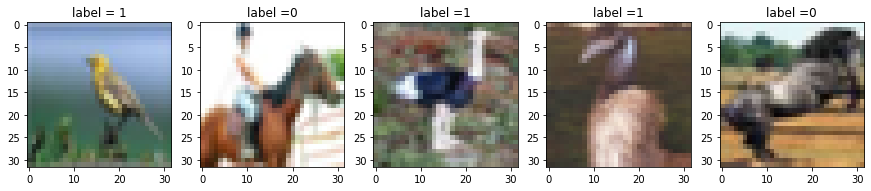

In [37]:
# Creating function for loading single batch of CIFAR-10 dataset
def single_batch_cifar10(file):
    # Opening file for reading in binary mode
    with open(file, 'rb') as f_single_batch:
        d_single_batch = pickle.load(f_single_batch, encoding='latin1')  # dictionary type, we use 'latin1' for python3
        x = d_single_batch['data']  # numpy.ndarray type, (10000, 3072)
        y = d_single_batch['labels']  # list type
        """Initially every batch's dictionary with key 'data' has shape (10000, 3072)
        Where, 10000 - number of image samples
        3072 - three channels of image (red + green + blue)
        Every row contains an image 32x32 pixels with its three channels"""
        
        # Here we reshape and transpose ndarray for further use
        # Firstly, we need to divide line (3072) for 3 channels
        # Then, we divide each channel for 32 by 32 matrixes
        # Finally, we use transpose to put channels at the end in order to be able to show images
        x = x.reshape(10000, 3, 32, 32).transpose(0, 2, 3, 1)  # (10000, 32, 32, 3)
        # Making numpy array from list of labels
        y = np.array(y)

        # Returning ready data
        return x, y


# Preparing labels for each class
# CIFAR-10 has 10 classes from 0 to 9
labels = ['dog', 'frog']

# Loading data from file
x, y = single_batch_cifar10('C:/Users/Admin/Downloads/cifar-10-python/cifar-10-batches-py/data_batch_1')

# Preparing list for storing indexes of birds and non-birds from dataset
indexes_for_birds = []
indexes_for_non_birds = []
# Going through loaded dataset and picking up needed indexes
for i in range(10000):
    if y[i] == 2:
        indexes_for_birds += [i]
    else:
        indexes_for_non_birds += [i]

# Checking how many images with birds we got
m_birds = len(indexes_for_birds)  # 1032
print(m_birds)
print()

# Getting from data only images with birds as we will work with one type only
batch_mask = indexes_for_birds
x_birds = x[batch_mask]
y_birds = np.ones((m_birds))
print(x_birds.shape, y_birds.shape, sep='\n')  # (1032, 32, 32, 3)  (1032,)
print()

# Getting from data images with non-birds
batch_mask = indexes_for_non_birds[:m_birds]  # Slicing to make amout of images with non-birds the same with birds
x_non_birds = x[batch_mask]
y_non_birds = np.zeros((m_birds))
print(x_non_birds.shape, y_non_birds.shape, sep='\n')  # (1032, 32, 32, 3)  (1032,)
print()

# Stacking data with birds and non-birds together
x = np.vstack((x_birds, x_non_birds))
y = np.hstack((y_birds, y_non_birds))
print(x.shape, y.shape, sep='\n')  # (2064, 32, 32, 3)  (2064,)
print()

# Shuffle data
# Multi-dimensional arrays are only shuffled along the first axis
# By using seed we generate two times the same random numbers and save appropriate connection: image --> label
np.random.seed(0)
np.random.shuffle(x)
np.random.seed(0)
np.random.shuffle(y)

# Preparing data for training and testing
# Data for training is taken with first 1900 examples
batch_mask = list(range(1900))  # [0 .. 1899]
x_train = x[batch_mask]  # (1900, 32, 32, 3)
y_train = y[batch_mask]  # (1900,)
# Data for testing is taken with last 100 examples
batch_mask = list(range(1900, 2064))  # [932 .. 1031]
x_test = x[batch_mask]  # (164, 32, 32, 3)
y_test = y[batch_mask]  # (164,)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape, sep='\n')

# Plotting 5 examples of images and checking labels
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 15) # Setting default size of plots
# Preparing figures for plotting
figure_1, ax = plt.subplots(nrows=1, ncols=5)
# 'ax 'is as (3,) np array and we can call each time ax[0]
ax[0].imshow(x_train[0])
ax[0].set_title('label = ' + str(int(y_train[0])))
ax[1].imshow(x_train[20])
ax[1].set_title('label =' + str(int(y_train[20])))
ax[2].imshow(x_train[300])
ax[2].set_title('label =' + str(int(y_train[300])))
ax[3].imshow(x_train[1000])
ax[3].set_title('label =' + str(int(y_train[1000])))
ax[4].imshow(x_train[1500])
ax[4].set_title('label =' + str(int(y_train[1500])))
plt.show()

In [22]:
x_train_flatten = x_train.reshape(x_train.shape[0], -1).T
y_train_columns = y_train.reshape(1, y_train.shape[0])
x_test_flatten = x_test.reshape(x_test.shape[0], -1).T
y_test_columns = y_test.reshape(1, y_test.shape[0])

print(x_train_flatten.shape)
print(y_train_columns.shape)
print(x_test_flatten.shape)
print(y_test_columns.shape)

(3072, 1900)
(1, 1900)
(3072, 164)
(1, 164)


In [23]:
x_train_processed = x_train_flatten / 255.0
x_test_processed = x_test_flatten / 255.0

In [24]:
# Function to calculate sigmoid
# Function computes sigmoid of input
# Input is a scalar or numpy array of any size
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))
    return s

In [25]:
# Function for parameters initilization
# Initializing weights as zero vector with shape (dim, 1) and bias as 0
def initialize_with_zeros(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

In [26]:
# Function for "forward" and "backward" propagation steps
# Computes the Cost Function and its Gradient
def propagate(w, b, x, y):
    # Number of input images
    m = x.shape[1]
    # Computing Activation
    A = sigmoid(np.dot(w.T, x) + b)
    # Computing Cost Function
    cost = (-1 / m) * (np.dot(y, np.log(A).T) + np.dot((1 - y), np.log(1 - A).T))
    cost = np.squeeze(cost)  # Deleting all 1-dimensions from array
    # Computing Gradient
    dw = (1 / m) * np.dot(x, (A - y).T)
    db = (1 / m) * np.sum(A - y)
    grad = {'dw': dw, 'db': db}
    
    return grad, cost

In [27]:
# Function for updating parameters
# Implementation of optimizing w and b by running Gradient Descent Algorithm
# Function returns:
# params - dictionary with weights and bias
# grads - dictionary with gradient of weights and bias
# cost_history - history with list of all costs computed during optimization
def optimize(w, b, x, y, number_of_iterations, learning_rate, print_cost = False):
    # Preparing list for storing history of computed cost
    cost_history = []
    
    # Iterating and optimizing parameters
    for i in range(number_of_iterations):
        # Computing cost and gradient
        grad, cost = propagate(w, b, x, y)
        # Retrieving derivatives
        dw = grad['dw']
        db = grad['db']
        
        # Updating parameters
        w -= learning_rate * dw
        b -= learning_rate * db
        
        # Recording cost into the history every 100 iterations
        if i % 100 == 0:
            cost_history.append(cost)
            
        # Printing cost every 100 iterations
        if print_cost and i % 100 == 0:
            print('Cost after {0}: {1}'.format(i, cost))
    
    # Saving updated parameters and gradient
    params = {'w': w, 'b': b}
    grad = {'dw': dw, 'db': db}
            
    return params, grad, cost_history

In [28]:
# Function for predicting
# Computing prediction scores and converting them
# into 0 if activation is less or equal to 0.5 
# into 1 if activation is more than 0.5# Function returns:
# Function returns:
# y_prediction - numpy array (vector) containing all predictions for input images
def predict(w, b, x):
    # Retrieving number of input images
    m = x.shape[1]
    # Preparing zero valued vector for results
    y_prediction = np.zeros((1, m))
    # Reshaping weights giving to it one more dimension
    w = w.reshape(x.shape[0], 1)
    
    # Computing vector A with probabilities
    A = sigmoid(np.dot(w.T, x) + b)
    
    # Converting probabilities to 1 or 0
    for i in range(A.shape[1]):
        if A[0, i] >= 0.5:
            y_prediction[0, i] = 1
        else:
            y_prediction[0, i] = 0
    
    return y_prediction

In [29]:
# Function for model
# Merging all helper functions into the model
# Function returns:
# d - dictionary with information about the model
def model(x_train_processed, y_train_columns, x_test_processed, y_test_columns, number_of_iterations = 2000, learning_rate = 0.5, print_cost = False):
    # Initializing parameters with 0
    w, b = initialize_with_zeros(x_train_processed.shape[0])
    
    # Optimization with Gradient Descent
    params, grad, cost_history = optimize(w, b, x_train_processed, y_train_columns, number_of_iterations, learning_rate, print_cost)
    
    # Retrieving updated parameters
    w = params['w']
    b = params['b']
    
    # Predictions for training and test datasets
    y_prediction_train = predict(w, b, x_train_processed)
    y_prediction_test = predict(w, b, x_test_processed)
    
    # Printing train and test accuracy
    # By calculating difference between y predicted and true y we receive matrix from which we calculate mean
    # That is error: np.mean(np.abs(y_prediction_train - y_train_columns)) * 100
    # Consequently, accuracy is: 100 - np.mean(np.abs(y_prediction_train - y_train_columns)) * 100
    print('train accuracy: {}'.format(100 - np.mean(np.abs(y_prediction_train - y_train_columns)) * 100))
    print('test accuracy: {}'.format(100 - np.mean(np.abs(y_prediction_test - y_test_columns)) * 100))
    
    d = {'cost_history': cost_history,
         'y_prediction_train' : y_prediction_train,
         'y_prediction_test': y_prediction_test, 
         'w' : w, 
         'b' : b,
         'learning_rate' : learning_rate,
         'number_of_iterations': number_of_iterations}
    
    return d

In [30]:
d = model(x_train_processed, y_train_columns, x_test_processed, y_test_columns, number_of_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after 0: 0.6931471805599446
Cost after 100: 0.6468725557043875
Cost after 200: 0.630431849472362
Cost after 300: 0.6215236428725204
Cost after 400: 0.6156335296501417
Cost after 500: 0.611258896244938
Cost after 600: 0.6077652381865709
Cost after 700: 0.6048369381577174
Cost after 800: 0.6022971029017306
Cost after 900: 0.6000376653906153
Cost after 1000: 0.597988376193194
Cost after 1100: 0.5961014468242076
Cost after 1200: 0.5943432353543159
Cost after 1300: 0.592689413714116
Cost after 1400: 0.5911219972845287
Cost after 1500: 0.5896274373593532
Cost after 1600: 0.5881953532634981
Cost after 1700: 0.5868176663823187
Cost after 1800: 0.5854879956946085
Cost after 1900: 0.5842012283298619
train accuracy: 68.57894736842105
test accuracy: 59.146341463414636


true label y = 1
predicted label y = 1


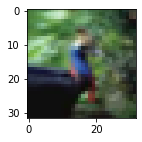

In [32]:
# Checking how different images were classified with algorithm
# Setting index to check from test dataset
index = 10

# Plotting this image, but firstly reshaping it in form of (32, 32, 3)
%matplotlib inline
plt.rcParams['figure.figsize'] = (2, 2) # Setting default size of plots
plt.imshow(x_test_flatten[:, index].reshape((32, 32, 3)))

# Showing label
print('true label y = ' + str(int(y_test_columns[0, index])))
print('predicted label y = ' + str(int(d['y_prediction_test'][0, index])))

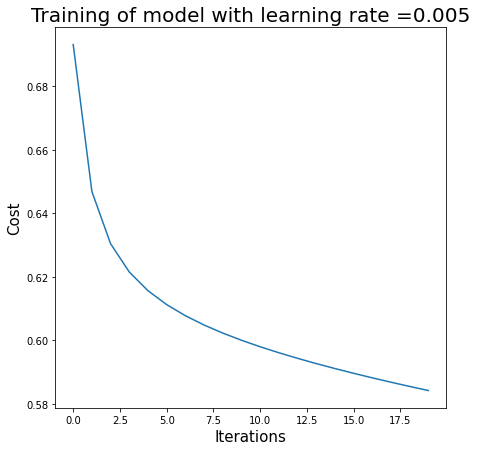

In [34]:
# Plotting history of calculated costs
%matplotlib inline
plt.rcParams['figure.figsize'] = (7, 7) # Setting default size of plots

# Retrieving costs from history and deleting one dimension from it
cost_history = np.squeeze(d['cost_history'])

# Plotting
plt.plot(cost_history)
plt.ylabel('Cost', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
plt.title('Training of model with learning rate =' + str(d['learning_rate']), fontsize=20)
plt.show()

learning_rate = 0.01
train accuracy: 70.52631578947368
test accuracy: 57.926829268292686

learning_rate = 0.001
train accuracy: 65.78947368421052
test accuracy: 60.97560975609756

learning_rate = 0.0001
train accuracy: 63.15789473684211
test accuracy: 57.926829268292686



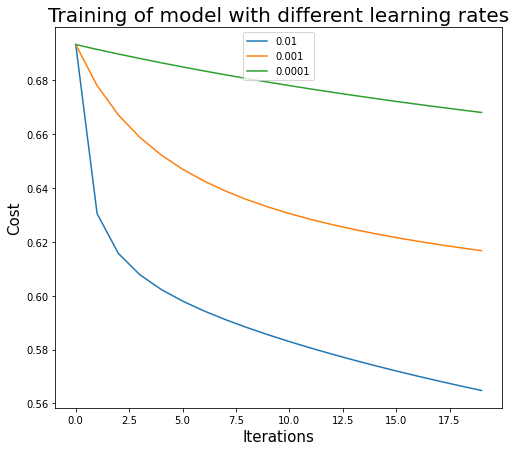

In [35]:
# It is very important to remember that learning rate determines how rapidly we will update parameters.
# And if learning rate is too large we might overshoot optimal value.
# Also, if learning rate is too small we might need too many iterations to converge to the best values.

# Creating list with different learning rates
learning_rates = [0.01, 0.001, 0.0001]

# Defining dictionary for models
models = {}

# Going through different learning rates
for i in learning_rates:
    print('learning_rate = ' + str(i))
    models[str(i)] = model(x_train_processed, y_train_columns, x_test_processed, y_test_columns, number_of_iterations = 2000, learning_rate = i, print_cost = False)
    print()
    
# Plotting history of calculated costs for every model
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,7) # Setting default size of plots

# Retrieving costs from history and deleting one dimension from it
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]['cost_history']), label=str(models[str(i)]['learning_rate']))

plt.ylabel('Cost', fontsize=15)
plt.xlabel('Iterations', fontsize=15)
plt.title('Training of model with different learning rates', fontsize=20)
plt.legend(loc='upper center')
plt.show()

In [ ]:
# Final Testing

# References: 
# https://www.cs.toronto.edu/~kriz/cifar.html
# CT5133 Deep Learning Sample Code by Prof. Michael Madden

# This function is taken from the CIFAR website
# Convert binary files to objects
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

# Load the image data batch 
def loadbatch(batchname):
    folder = "C:/Users/Admin/Downloads/cifar-10-python/cifar-10-batches-py"
    batch = unpickle(folder+"/"+batchname)
    return batch
    
# Prepare the dataset to be passed to the model - green channel: 1024 values (32 * 32) pixels 
def ReadImagedata(BatchName):
    # Load the data from required batch 
    batch = loadbatch(BatchName)

    # Extract the features and labels
    data = batch[b'data']
    labels = np.array(batch[b'labels'])

    # Reference: https://towardsdatascience.com/cifar-10-image-classification-in-tensorflow-5b501f7dc77c
    # Reshape the features to single column of 1024 values (taking green channel)
    reshaped = (data.reshape((len(data), 3, 1024)).transpose(1, 2, 0))[1].T

    # Reference: https://stackoverflow.com/questions/59646288/is-there-a-way-to-extract-just-a-needed-class-from-cifar-10-training-dataset
    # Extract the images of BIRD and DOG class only 
    bird_dog = ((labels == 2) | (labels == 8)).reshape(reshaped.shape[0])
    X = reshaped[bird_dog]
    y = labels[bird_dog]
    # Change the labels of bird and dog (2 and 8) to binary (0 and 1) respectively
    y = np.array([0 if label == 2 else 1 for label in y])
    
    # Reference: https://www.geeksforgeeks.org/python-extract-numbers-from-string/
    
    if 'test' not in BatchName:
        print("Batch Number = %d" % [int(n) for n in BatchName.split('_') if n.isdigit()][0])
    else:
        print("Batch = Test Dataset")
    print ("Batch size = %d" % len(X))
    print ("Bird dataset = %d" % len(y[y==0]))
    print ("Dog dataset = %d" % len(y[y==1]))
    return X, y

def visualise(data, index):
    picture = data[index]
    # Initially, the data is a 1D array of 1024 pixels; reshape it to a 2D array of 32x32 pixels
    picture.shape = (32,32) 
    plt.imshow(picture)
    plt.show()
# print("CIFAR-10 Training Dataset\n")
# Load the data from training batch 4
X, y = ReadImagedata('data_batch_4')

In [11]:
# References:
# https://towardsdatascience.com/building-a-neural-network-with-a-single-hidden-layer-using-numpy-923be1180dbf
# CT4101 Machine Learning Assignment 2 (Submission ID: 1462363337)
# CT5133 Deep Learning Lecture Notes by Prof. Michael Madden

# Build an Enhanced NN - add additional hidden layer
class EnhancedNN:
    
    # Constructor function to intialize learning rate alpha, number of iterations and threshold
    def __init__(self, alpha = 0.01, iterations = 1000, threshold = 1e-6): 
        self.alpha = alpha
        self.iterations = iterations
        self.threshold = threshold
    
    # Set weights and bias to a set of valid initial values
    def Initialise_wb(self, X_features, l1_hidden_nodes, l2_hidden_nodes):
        # Initialise small random values to the weights for nodes in first hidden layer
        W1 = np.random.normal(0, 0.01, size = (X_features, l1_hidden_nodes))
        # Initialise bias = 0 for nodes in first hidden layer
        b1 = np.zeros((l1_hidden_nodes, 1))
        # Initialise small random values to the weights for nodes in second hidden layer
        W2 = np.random.normal(0, 0.01, size = (l2_hidden_nodes, l1_hidden_nodes))
        # Initialise bias = 0 for nodes in second hidden layer
        b2 = np.zeros((l2_hidden_nodes, 1))
        # Initialise small random values to the weights for the node in the output layer
        W3 = np.random.normal(0, 0.01, size = (1, l2_hidden_nodes))
        # Initialise bias = 0 for the node in the output layer
        b3 = 0
        return W1, b1, W2, b2, W3, b3

    # Activation function to find sigmoid values of input
    def Sigmoid(self, z): 
        # Reference : https://stackoverflow.com/questions/47966728/how-to-fix-float-object-has-no-attribute-exp?noredirect=1&lq=1
        z = np.array(z,dtype=float)
        # Reference: https://www.programcreek.com/python/example/11224/numpy.seterr
        self.err_status = np.geterr()
        np.seterr(over = 'ignore')
        return 1 / (1 + np.exp(-z))
    
    # Forward Propagation step
    def ForwardPropagation(self, W1, b1, W2, b2, W3, b3, X):
        # Compute A1 using the tanh activation function
        A1 = np.tanh(np.dot(W1.T, X.T) + b1)
        # Compute A2 and A3 (y_hat) using the sigmoid activation function
        A2 = self.Sigmoid(np.dot(W2, A1) + b2)
        A3 = self.Sigmoid(np.dot(W3, A2) + b3)
        return A1, A2, A3
        
    # Backward Propagation step and compute the cost
    def BackwardPropagation(self, A1, A2, A3, W3, W2, X, y):
        n = X.shape[1]
        
        # Calculate the cost function (J) 
        J = - np.sum((y * np.log(A3)) + ((1 - y) * (np.log(1 - A3)))) / y.shape[0]
        
        # Backward propagation
        dZ3 = A3 - y
        dW3 = (1/n) * np.dot(dZ3, A2.T)
        db3 = (1/n) * np.sum(dZ3, axis=1, keepdims=True)
        
        dZ2 = (A2 * (1 - A2)) * (np.dot(W3.T, dZ3))
        dW2 = (1/n) * np.dot(dZ2, A1.T)
        db2 = (1/n) * np.sum(dZ2, axis=1, keepdims=True)
        
        dZ1 = (1 - np.power(A1, 2)) * (np.dot(W2.T, dZ2))
        dW1 = (1/n) * np.dot(dZ1, X)
        db1 = (1/n) * np.sum(dZ1, axis=1, keepdims=True)
        
        return J, dW3, db3, dW2, db2, dW1, db1
    
    # Update the Weights and bias terms using batch gradient descent
    def UpdateGD(self, W1, b1, W2, b2, W3, b3, X, y):
        # Store the Cost function over all iterations
        self.Cost = []

        # Iterate through the maximum number of iterations
        for i in range(self.iterations):            
            # Forward Propagation
            A1, A2, A3 = self.ForwardPropagation(W1, b1, W2, b2, W3, b3, X)
            # Cost and Backward Propagation
            J_curr, dW3, db3, dW2, db2, dW1, db1 = self.BackwardPropagation(A1, A2, A3, W3, W2, X, y)

            # Update the weights and bias
            W1 -= self.alpha * dW1.T
            b1 -= self.alpha * db1
            W2 -= self.alpha * dW2
            b2 -= self.alpha * db2
            W3 -= self.alpha * dW3
            b3 -= self.alpha * db3
            
            # Record the costs
            self.Cost.append(J_curr)
            
        return W1, b1, W2, b2, W3, b3
    
    # Train the model using the training data
    def Train(self, X, y, l1_hidden_nodes = 1, l2_hidden_nodes = 1): 
        self.l1_hidden_nodes = l1_hidden_nodes
        self.l2_hidden_nodes = l2_hidden_nodes
        W1, b1, W2, b2, W3, b3 = self.Initialise_wb(X.shape[1], l1_hidden_nodes, l2_hidden_nodes)
        self.W1, self.b1, self.W2, self.b2, self.W3, self.b3 = self.UpdateGD(W1, b1, W2, b2, W3, b3, X, y)
        return self

    # Predict the values of the test data
    def Predict(self, X): 
        A1, A2, predictions = self.ForwardPropagation(self.W1, self.b1, self.W2, self.b2, self.W3, self.b3, X)
        y_prediction = [1 if p > 0.5 else 0 for p in np.squeeze(predictions)]
        return y_prediction

    # Score function to determine the accuracy of the model
    def Score(self, X, y): 
        size = len(y)        
        # Number of correct matches divided by total number of inputs
        return sum(self.Predict(X) == y) / size 
    
    # Utility function to plot the Cost of the model
    def PlotCostFunction(self):
        plt.plot(range(len(self.Cost)), self.Cost, 'blue')
        plt.title(" Cost Function of Enhanced Neural Network Model")
        plt.xlabel("Iterations")
        plt.ylabel("Cost")
        plt.show()
        
# Utility functions to train and test the Enhanced Neural Network Model and output formatted results
def EnhancedNNResults(Title, Model, X, y, l1_hidden_nodes = 1, l2_hidden_nodes = 1):
    # List to store the accuracy scores
    Scores = list()

    print(Title,"\n")
    for i in range(10):
        # Reference: https://algotrading101.com/learn/train-test-split/
        # Split the dataset into Train-Validation-Test data (70-15-15)
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.85, shuffle = True, random_state = 105)
        X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size = 0.824, shuffle = True, random_state = 105)

        # Train the model using training data and Predict using test data
        Model.Train(X_train, y_train, l1_hidden_nodes, l2_hidden_nodes)       
        Prediction = Model.Predict(X_test)
        Score = Model.Score(X_test, y_test)
        print("Accuracy %d = %.2f" % (i + 1, Score))
        Scores.append(Score)

    # Average accuracy score over the 10 runs
    print("\nMean Accuracy = %.2f" % np.mean(Scores))
    # Plot the Cost vs Iterations
    Model.PlotCostFunction()
    print("\nMODEL DETAILS:")
    print("Maximum Iterations = %d" % Model.iterations)
    print("Iterations Completed = %d" % len(Model.Cost))
    # Reference: https://stackoverflow.com/questions/2440692/formatting-floats-without-trailing-zeros
    print("Learning Rate = %s" % f'{Model.alpha:g}')
    print("Nodes in Hidden Layer 1 = %d" % Model.l1_hidden_nodes)
    print("Nodes in Hidden Layer 2 = %d" % Model.l2_hidden_nodes)

In [ ]:
# Load the data from training batch 4
X, y = ReadImagedata('data_batch_4')

# Train and test the CIFAR-10 dataset using Enhanced NN model
EnhancedNNResults('\nCIFAR-10 Dataset', EnhancedNN(iterations = 8500), X, y, 15, 15)

Batch Number = 4
Batch size = 2065
Bird dataset = 1041
Ship dataset = 1024

CIFAR-10 Dataset 



In [ ]:
# Final Testing
print("CIFAR-10 Training Dataset\n")
# Load the data from training batch 4
X, y = ReadImagedata('data_batch_4')

# Train the model with the entire training data (without splitting into Train-Validation-Test)
Model = EnhancedNN(iterations = 8500)
Model.Train(X, y, 15, 15) 

# Plot the Cost vs Iterations
Model.PlotCostFunction()
print("\nMODEL DETAILS:")
print("Maximum Iterations = %d" % Model.iterations)
print("Iterations Completed = %d" % len(Model.Cost))
# Reference: https://stackoverflow.com/questions/2440692/formatting-floats-without-trailing-zeros
print("Learning Rate = %s" % f'{Model.alpha:g}')
print("Nodes in Hidden Layer 1 = %d" % Model.l1_hidden_nodes)
print("Nodes in Hidden Layer 2 = %d" % Model.l2_hidden_nodes)

print("\nCIFAR-10 Testing Dataset\n")
# Load the data from test batch
X_test, y_test = ReadImagedata('test_batch')

# Predict the test data (unknown cases)
Prediction = Model.Predict(X_test)
Score = Model.Score(X_test, y_test)
print("Accuracy on test data = %.2f" % Score)